Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X_train shape:  (4579, 106)
y_train shape:  (4579,)
X_test shape:  (1145, 106)
y_test shape:  (1145,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               13696     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 6)                 390       
                     

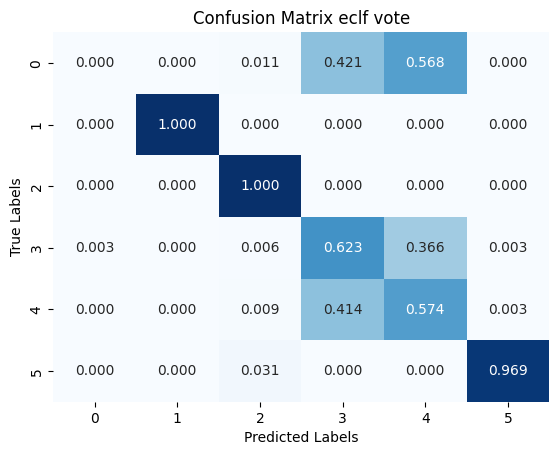

In [6]:
import os
os.environ["KERAS_BACKEND"] = "torch"
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.inspection import permutation_importance
from keras.callbacks import EarlyStopping
'''
datatypes ={"Survived":"category","Pclass":"category","Sex":"category","Embarked":"category"}
df = pd.read_csv("train.csv",dtype=datatypes)
'''

def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

df = pd.read_csv("/content/drive/My Drive/moutput.csv")
data =df.drop(["gtype","seed","parameter"],axis="columns")
labels =df["gtype"]
mapping = {'CMRG': 0, 'LCG': 1,'LCG64':2,'LFG':3,'MLFG':4,'PMLCG':5}
mlabels =labels.replace(mapping)
standardScaler = StandardScaler()
datas = standardScaler.fit_transform(data,labels)



X_train, X_test, y_train, y_test = train_test_split(datas,mlabels,test_size=0.2,random_state=42,stratify=labels)



print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_test_array = X_test
X_train_array = X_train
y_train_cat = to_categorical(y_train, 6)
y_test_cat = to_categorical(y_test, 6)


model = Sequential()

model.add(Input(shape=(106,)))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="softmax"))
model.summary()

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics= ["accuracy"])
early_stop = EarlyStopping(patience=2)
hist = model.fit(X_train_array, y_train_cat, epochs = 50, batch_size = 8,validation_split=0.2,callbacks=[early_stop])

score = model.evaluate(X_test_array, y_test_cat, verbose=0)
print(f"The score: {score}")

preds = model.predict(X_test_array)
#print(f"prob survived: {preds[:,1]}")
def largest(ls):
    max = 0
    for i in range(0,len(ls)):
        count = 0
        if ls[max]<ls[i]:
          max = i
    return max
predictions =[]
for i in range(0,len(preds)):
  predictions.append(largest(preds[i]))
#predictions = [(np.argmax(pred) > 0.5).astype(int) for pred in preds]
#print(f"the predictions: {predictions}")
print(y_test_cat)

print(predictions)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.4f}')

print(classification_report(y_test, predictions))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cm = confusion_matrix(y_test, predictions, normalize="true")


#plot_loss(hist, "linear Sequential", 0)
#plot_loss(careful_bias_history, "Careful Bias", 1)
#plt.show()
sns.heatmap(cm, annot=True, fmt="0.3f", cmap="Blues", cbar=False)#,xticklabels=["died","survived"],yticklabels=["died","survived"])
plt.title("Confusion Matrix nn")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

